<a href="https://colab.research.google.com/github/karansatpute227/nlp-p/blob/main/pl5p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
recognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('letter-recognition.data')

In [4]:
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       19999 non-null  object
 1   2       19999 non-null  int64 
 2   8       19999 non-null  int64 
 3   3       19999 non-null  int64 
 4   5       19999 non-null  int64 
 5   1       19999 non-null  int64 
 6   8.1     19999 non-null  int64 
 7   13      19999 non-null  int64 
 8   0       19999 non-null  int64 
 9   6       19999 non-null  int64 
 10  6.1     19999 non-null  int64 
 11  10      19999 non-null  int64 
 12  8.2     19999 non-null  int64 
 13  0.1     19999 non-null  int64 
 14  8.3     19999 non-null  int64 
 15  0.2     19999 non-null  int64 
 16  8.4     19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
df.describe()

,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000
mean,4.023651,7.035452,5.121956,5.372469,3.505975,6.897545,7.500175,4.628831,5.178609,8.282164,6.453823,7.928996,3.046252,8.338867,3.691935,7.80119
std,1.913206,3.304631,2.014568,2.261445,2.190441,2.026071,2.325087,2.699837,2.380875,2.488485,2.631016,2.080671,2.332500,1.546759,2.567004,1.61751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [9]:
df.isnull().sum()

,0
T,0
2,0
8,0
3,0
5,0
1,0
8.1,0
13,0
0,0
6,0


In [11]:
import matplotlib.pyplot as plt

(array([[2.3430e+03, 1.5210e+03, 2.3020e+03, 1.5790e+03, 2.2860e+03,
         1.5310e+03, 2.2470e+03, 1.5710e+03, 2.3330e+03, 2.2860e+03],
        [4.3010e+03, 8.6340e+03, 6.0690e+03, 7.9700e+02, 1.8900e+02,
         7.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0170e+03, 2.6720e+03, 5.5730e+03, 4.8810e+03, 4.1570e+03,
         4.6900e+02, 2.3000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.8650e+03, 5.8090e+03, 9.8490e+03, 2.0970e+03, 3.6700e+02,
         1.0000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.5520e+03, 4.2770e+03, 9.0250e+03, 3.9060e+03, 2.1000e+02,
         2.5000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.4190e+03, 7.0960e+03, 4.3890e+03, 8.0200e+02, 2.6700e+02,
         2.0000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.9400e+02, 1.7490e+03, 1.0521e+04, 5.7700e+03, 1.3410e+03,
         1.1000e+02, 1.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.7400e+02, 1.2020

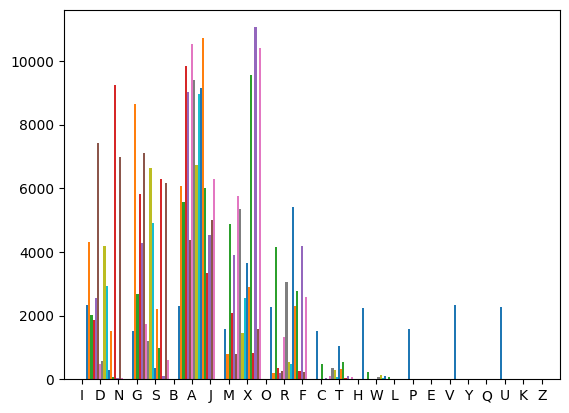

In [12]:
plt.hist(df)

In [19]:
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [21]:
df.shape

(19999, 17)

In [22]:
df.size

339983

In [30]:
# Replace this line:
# df1 = pd.read_csv(df, header=None, names=column_names)

# With this line:
df.columns = column_names

In [29]:
df1 = pd.read_csv( df,header=None, names=column_names)

TypeError: argument of type 'method' is not iterable